In [1]:
# Copyright Namu Park, 2020, Yonsei Digital Analytics

In [1]:
import numpy as np
import pandas as pd
import re
import operator
import fasttext
import glob

In [2]:
from tqdm import tqdm_notebook

In [3]:
file_path = glob.glob('34 paper final/*.txt')

In [4]:
total_raw = []
for x in file_path:
    with open(x, 'r', encoding='iso-8859-1') as f:
        a = f.read()
    total_raw.append(a)

In [5]:
len(total_raw)

34

In [26]:
total_raw[0]

'A data-driven drug repositioning framework discovered a\n\npotential therapeutic agent targeting COVID-19\n\nYiyue Ge1,2,\n\n, Tingzhong Tian1,2,\n\n, Suling Huang3,\n\n, Fangping Wan1,\n\n, Jingxin Li2,\n\n,\n\nShuya Li1\n\n, Hui Yang11\n\n, Lixiang Hong1\n\n, Nian Wu1\n\n, Enming Yuan1\n\n, Lili Cheng4\n\n, Yipin\n\nLei11\n\n, Hantao Shu1\n\n, Xiaolong Feng6,7\n\n, Ziyuan Jiang5\n\n, Ying Chi2\n\n, Xiling Guo2\n\n, Lunbiao\n\nCui2\n\n, Liang Xiao10\n\n, Zeng Li10\n\n, Chunhao Yang3\n\n, Zehong Miao3\n\n, Haidong Tang4\n\n, Ligong\n\nChen4\n\n, Hainian Zeng11\n\n, Dan Zhao1,*\n\n, Fengcai Zhu2,8,*\n\n, Xiaokun Shen10,*\n\n, Jianyang\n\nZeng1,9,*\n\n1\n\nInstitute for Interdisciplinary Information Sciences, Tsinghua University, Beijing, 100084, China.\n\n2\n\nNHC Key laboratory of Enteric Pathogenic Microbiology, Jiangsu Provincial Center for Diseases\n\nControl and Prevention, Nanjing, Jiangsu Province, 210009, China.\n\n3\n\nShanghai Institute of Materia Medica, Chinese Academy of S

In [6]:
total_sentence = ''
for x in total_raw:
    total_sentence+=x

In [7]:
len(total_sentence.split())

200491

In [8]:
def preprocess(txt):
    b = txt.replace('i.e.','')

    b = b.replace('-\n\n', '')
    b = b.replace('\n\n', ' ')
    b = b.replace('\n', ' ')
    
    b = b.replace('\n\n', ' ')
    b = b.replace('\n', ' ')
    b = b.replace('\n\n', ' ')
    b = b.replace('\n', ' ')
    
    b = b.replace('(', ' ')
    b = b.replace(')', ' ')
    b = b.replace(',', '')
    
    b = re.sub('[^\#0-9A-Za-z-]', ' ',b)
    b = re.sub(' +', ' ',b)
    b= b.strip()

    # print(b)
#     b = b.lower()
    if 'References' in b and len(b.split('References')[0])>15:
        b = b.split('References')[0]
    if 'Introduction' in b:
        b = b.split('Introduction')[1]
    if 'Abstract' in b:
        b = b.split('Abstract')[1]
    b = b.lower()    
    b = b.replace('et al.','')
    b = b.replace('table','')
    b = b.replace('figure','')

    return b

In [9]:
k = preprocess(total_sentence)
k

' the outbreak of the pneumonia named covid-19 caused by the novel coronavirus sars-cov-2 2019-ncov has infected over 110000 people worldwide by 8th march 2020 apart from china other countries or regions including south korea iran and europe have reported a rapid increase in the number of covid-19 cases implying that this novel coronavirus has posed a global health threat under the current circumstance of the absence of the specific vaccines and medicines against sars-cov-2 it is urgent to discover effective therapies especially drugs to treat the resulting covid-19 disease and prevent the virus from further spreading considering that the development of a new drug generally takes years probably the best therapeutic shortcut is to apply the drug repositioning strategy finding the new uses of old drugs 1 2 3 to identify the potential antiviral effects against sars-cov-2 of existing drugs that have been approved for clinical use or to enter clinical trials those existing drugs with potent

In [10]:
word_list1 = k.split()

In [11]:
new_total = []
for word in tqdm_notebook(word_list1):
    if word[-1]=='s' and word[:-1] in word_list1:
        new_total.append(word[:-1])
    else:
        new_total.append(word)

C:\Users\arbre\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [12]:
word_list2 = [x for x in new_total if len(x)>=3]

In [13]:
word_list2[0]

'the'

In [14]:
len(word_list2)

6672

In [15]:
total_sentence = ' '.join(word_list2)

In [23]:
with open('no_plural_total_sentence.txt', 'w', encoding='utf-8') as f:
    f.write(total_sentence)

In [24]:
# minn=3, maxn=5, dim=100, lr=0.05, epoch=5가 default

dim=100
lr=0.05
epoch=15
minn=3
maxn=7

model = fasttext.train_unsupervised('./no_plural_total_sentence.txt', model='skipgram', minn=minn, epoch=epoch)

###### default로 5번 이상 등장하는 단어만 사용 

In [25]:
model.get_words()

['the',
 'and',
 'for',
 'with',
 'drug',
 'that',
 'were',
 'are',
 'cell',
 'from',
 'virus',
 'protein',
 'sars-cov-2',
 'this',
 'coronavirus',
 'covid-19',
 'treatment',
 'infection',
 'viral',
 'inhibitor',
 'human',
 'patient',
 'used',
 'figure',
 'antiviral',
 'which',
 'against',
 'have',
 'disease',
 'protease',
 'binding',
 'using',
 'clinical',
 'sars-cov',
 '2019-ncov',
 'doi',
 'these',
 'compound',
 'target',
 'data',
 'also',
 'chloroquine',
 'structure',
 'can',
 'model',
 'interaction',
 'potential',
 'effect',
 'all',
 'sar',
 'respiratory',
 'residue',
 'china',
 'result',
 'two',
 'study',
 'other',
 'mpro',
 'activity',
 'therapeutic',
 'been',
 'acid',
 'not',
 'our',
 'table',
 'rna',
 'molecular',
 'novel',
 'agent',
 'molecule',
 'between',
 'receptor',
 'trial',
 'analysis',
 'sequence',
 'may',
 'both',
 'replication',
 'new',
 'site',
 'method',
 'such',
 'approved',
 'host',
 'gene',
 'docking',
 'their',
 'into',
 'inhibit',
 'infected',
 'than',
 'shown

In [26]:
# model.save_model('./34_paper_total.bin')
# len(model.get_words())

3614

In [16]:
model = fasttext.load_model('./litcovid/litcovid_fasttext_0623.bin')

In [17]:
word_list = model.get_words()

In [18]:
[x for x in word_list if x[:-1] not in word_list]

['covid-19',
 'sars-cov-2',
 'drug',
 'coronavirus',
 'treatment',
 'disease',
 'clinical',
 'infection',
 'virus',
 'respiratory',
 'pandemic',
 'viral',
 'severe',
 'potential',
 'antiviral',
 'health',
 'study',
 'novel',
 'acute',
 'studies',
 'syndrome',
 'effective',
 'also',
 'hydroxychloroquine',
 'human',
 'new',
 'data',
 'therapeutic',
 'available',
 'protein',
 'trial',
 'binding',
 'china',
 'current',
 'including',
 'using',
 'care',
 'however',
 'two',
 'group',
 'high',
 'review',
 'world',
 'outbreak',
 'approved',
 'development',
 'global',
 'therapy',
 'currently',
 'efficacy',
 'hcq',
 'associated',
 'control',
 'risk',
 'need',
 'reported',
 'based',
 'chloroquine',
 'evidence',
 'sars-cov',
 'several',
 'remdesivir',
 'research',
 'safety',
 'patient',
 'target',
 'protease',
 'specific',
 'spread',
 'first',
 'molecular',
 'main',
 'vaccine',
 'analysis',
 'activity',
 'hospital',
 'rna',
 'wuhan',
 'among',
 'one',
 'possible',
 'receptor',
 'mortality',
 'well'

In [19]:
word_list = [x for x in word_list if x!='doi']
word_list = [x for x in word_list if x!='1016/j']


In [20]:
len(word_list)

1447

In [21]:
word_list[:500]

['covid-19',
 'sars-cov-2',
 'patients',
 'drug',
 'coronavirus',
 'drugs',
 'treatment',
 'disease',
 'clinical',
 'infection',
 'virus',
 'respiratory',
 'pandemic',
 'viral',
 'severe',
 'potential',
 'antiviral',
 'health',
 'study',
 'trials',
 'use',
 'novel',
 'used',
 'acute',
 'studies',
 'syndrome',
 'effective',
 'also',
 'hydroxychloroquine',
 'human',
 'new',
 'data',
 'therapeutic',
 'results',
 'available',
 'protein',
 'trial',
 'binding',
 'china',
 'current',
 'ace2',
 'effects',
 'caused',
 'including',
 'using',
 'care',
 'cases',
 'however',
 'two',
 'group',
 'high',
 'review',
 'world',
 'outbreak',
 'approved',
 'development',
 'global',
 'therapy',
 'currently',
 'efficacy',
 'hcq',
 'associated',
 'compounds',
 'control',
 'cells',
 'risk',
 'need',
 'reported',
 'based',
 'chloroquine',
 'evidence',
 'sars-cov',
 'several',
 'remdesivir',
 'inhibitors',
 'research',
 'diseases',
 'safety',
 'patient',
 'target',
 'protease',
 'specific',
 'spread',
 'first',


In [22]:
word_list[-500:]

['ensure',
 'offer',
 'affect',
 'homology',
 'carried',
 'contribute',
 'types',
 'play',
 'recognition',
 'maximum',
 'detected',
 'guidance',
 'set',
 'successful',
 'body',
 'drug-induced',
 'short',
 'hospitalization',
 'nasopharyngeal',
 'iii',
 'fusion',
 'point',
 'determine',
 'throughout',
 'extensive',
 'determined',
 'stay',
 'highlights',
 'quickly',
 'specifically',
 'preliminary',
 'fight',
 'analyze',
 'recommend',
 'area',
 'species',
 'scale',
 'persons',
 'mutation',
 'another',
 'diagnostic',
 'duration',
 'plays',
 'seems',
 'facilitate',
 'rights',
 'shortage',
 'susceptible',
 'optimal',
 'costs',
 'men',
 'enrolled',
 'facing',
 'mtor',
 'globe',
 'efficiency',
 's-protein',
 'unclear',
 'at1r',
 'issues',
 'fatality',
 'prospective',
 'light',
 'successfully',
 'contagious',
 'special',
 'fibrosis',
 'adrs',
 'applications',
 'ml',
 'binds',
 'linked',
 'pathogen',
 'markers',
 'appears',
 'odds',
 'prophylactic',
 'regimens',
 'involving',
 'aes',
 'etc',
 'co

In [28]:
total_raw = [preprocess(x) for x in total_raw]

In [29]:
N = len(total_raw) # 총 문서의 수

def tf(t, d):
    return d.count(t)

def idf(t):
    df = 0
    for doc in total_raw:
        df += t in doc
    return np.log(N/(df + 1))

def tfidf(t, d):
    return tf(t,d)* idf(t)

In [30]:
N

34

In [38]:
result = []
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = total_raw[i]
    for j in range(len(word_list)):
        t = word_list[j]        
        result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = word_list)
tf_.head()

,covid-19,sars-cov-2,patients,drug,coronavirus,drugs,treatment,disease,clinical,infection,...,3c-like,telephone,synthetic,ascorbic,assays,turn,populations,science,room,hypothesize
0,26,75,19,119,27,37,25,13,20,32,...,0,0,0,0,5,0,0,6,2,0
1,5,37,1,25,4,13,4,4,1,3,...,1,0,1,0,0,0,0,0,0,0
2,42,0,0,14,19,10,0,0,3,5,...,0,0,0,0,0,2,0,3,0,0
3,12,43,7,19,1,9,8,9,18,16,...,0,0,0,0,4,0,0,5,1,0
4,45,11,35,28,54,8,53,15,102,25,...,0,0,0,1,0,0,0,2,0,0


In [39]:
tf_ = tf_.loc[:, (tf_ != 0).any(axis=0)]

In [41]:
tf_.shape

(34, 1388)

In [42]:
result = []
for j in range(len(word_list)):
    t = word_list[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index = word_list, columns = ["IDF"])
idf_.head()

,IDF
covid-19,0.092373
sars-cov-2,0.194156
patients,0.194156
drug,0.000000
coronavirus,-0.028988


In [43]:
idf_ = idf_.loc[:, (idf_ != 0).any(axis=0)]

In [44]:
idf_.shape

(1447, 1)

In [45]:
result = []
for i in range(N):
    result.append([])
    d = total_raw[i]
    for j in range(len(word_list)):
        t = word_list[j]

        result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = word_list)
tfidf_

,covid-19,sars-cov-2,patients,drug,coronavirus,drugs,treatment,disease,clinical,infection,...,3c-like,telephone,synthetic,ascorbic,assays,turn,populations,science,room,hypothesize
0,2.401706,14.561701,3.688964,0.0,-0.782663,1.104560,2.309333,2.067841,1.212492,0.955295,...,0.000000,0.0,0.000000,0.000000,5.207269,0.000000,0.000000,2.345198,3.160901,0.000000
1,0.461867,7.183773,0.194156,0.0,-0.115950,0.388089,0.369493,0.636259,0.060625,0.089559,...,1.734601,0.0,2.140066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3.879679,0.000000,0.000000,0.0,-0.550763,0.298530,0.000000,0.000000,0.181874,0.149265,...,0.000000,0.0,0.000000,0.000000,0.000000,1.774606,0.000000,1.172599,0.000000,0.000000
3,1.108480,8.348709,1.359092,0.0,-0.028988,0.268677,0.738987,1.431582,1.091243,0.477647,...,0.000000,0.0,0.000000,0.000000,4.165815,0.000000,0.000000,1.954332,1.580450,0.000000
4,4.156799,2.135716,6.795461,0.0,-1.565327,0.238824,4.895786,2.385970,6.183711,0.746324,...,0.000000,0.0,0.000000,2.833213,0.000000,0.000000,0.000000,0.781733,0.000000,0.000000
5,1.939840,1.164936,1.164936,0.0,-0.202913,0.149265,0.831360,0.954388,0.181874,0.268677,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.781733,0.000000,0.000000
6,0.184747,3.106496,0.194156,0.0,-0.115950,0.447794,0.461867,0.159065,0.000000,0.328383,...,0.000000,0.0,0.000000,0.000000,3.124362,0.000000,0.000000,0.000000,0.000000,0.000000
7,1.939840,0.194156,1.359092,0.0,-0.057975,0.238824,0.369493,0.000000,0.848745,0.208971,...,0.000000,0.0,0.000000,0.000000,0.000000,1.774606,0.000000,1.172599,0.000000,0.000000
8,2.309333,3.300652,15.726637,0.0,-0.376838,0.179118,6.004266,1.590647,1.273117,0.179118,...,0.000000,0.0,0.000000,0.000000,0.000000,0.887303,0.000000,1.172599,0.000000,0.000000
9,0.554240,9.125333,1.941560,0.0,-0.202913,1.462795,1.570346,1.908776,2.667483,2.298678,...,0.000000,0.0,0.000000,0.000000,6.248723,0.000000,0.000000,2.736064,4.741351,0.000000


In [46]:
tfidf_ = tfidf_.loc[:, (tfidf_ != 0).any(axis=0)]

In [47]:
tfidf_.head()

,covid-19,sars-cov-2,patients,coronavirus,drugs,treatment,disease,clinical,infection,virus,...,bacterial,3c-like,synthetic,ascorbic,assays,turn,populations,science,room,hypothesize
0,2.401706,14.561701,3.688964,-0.782663,1.104560,2.309333,2.067841,1.212492,0.955295,-2.550903,...,0.000000,0.000000,0.000000,0.000000,5.207269,0.000000,0.0,2.345198,3.160901,0.0
1,0.461867,7.183773,0.194156,-0.115950,0.388089,0.369493,0.636259,0.060625,0.089559,-0.318863,...,0.000000,1.734601,2.140066,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2,3.879679,0.000000,0.000000,-0.550763,0.298530,0.000000,0.000000,0.181874,0.149265,-1.101526,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.774606,0.0,1.172599,0.000000,0.0
3,1.108480,8.348709,1.359092,-0.028988,0.268677,0.738987,1.431582,1.091243,0.477647,-0.811651,...,0.000000,0.000000,0.000000,0.000000,4.165815,0.000000,0.0,1.954332,1.580450,0.0
4,4.156799,2.135716,6.795461,-1.565327,0.238824,4.895786,2.385970,6.183711,0.746324,-2.116090,...,2.447551,0.000000,0.000000,2.833213,0.000000,0.000000,0.0,0.781733,0.000000,0.0


In [48]:
tfidf_.index = list(range(1,35))

In [49]:
tfidf_.head()

,covid-19,sars-cov-2,patients,coronavirus,drugs,treatment,disease,clinical,infection,virus,...,bacterial,3c-like,synthetic,ascorbic,assays,turn,populations,science,room,hypothesize
1,2.401706,14.561701,3.688964,-0.782663,1.104560,2.309333,2.067841,1.212492,0.955295,-2.550903,...,0.000000,0.000000,0.000000,0.000000,5.207269,0.000000,0.0,2.345198,3.160901,0.0
2,0.461867,7.183773,0.194156,-0.115950,0.388089,0.369493,0.636259,0.060625,0.089559,-0.318863,...,0.000000,1.734601,2.140066,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
3,3.879679,0.000000,0.000000,-0.550763,0.298530,0.000000,0.000000,0.181874,0.149265,-1.101526,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.774606,0.0,1.172599,0.000000,0.0
4,1.108480,8.348709,1.359092,-0.028988,0.268677,0.738987,1.431582,1.091243,0.477647,-0.811651,...,0.000000,0.000000,0.000000,0.000000,4.165815,0.000000,0.0,1.954332,1.580450,0.0
5,4.156799,2.135716,6.795461,-1.565327,0.238824,4.895786,2.385970,6.183711,0.746324,-2.116090,...,2.447551,0.000000,0.000000,2.833213,0.000000,0.000000,0.0,0.781733,0.000000,0.0


In [51]:
total_a = []
total_b = []

for doc_num in range(1, N+1):
    a = [] 
    b = [] 
    
    tfidf_dic = {}
    for x in tfidf_.columns:
#         print(x, tfidf_.loc[doc_num][x])
        tfidf_dic[x] = tfidf_.loc[doc_num][x]
    tfidf_sorted = sorted(tfidf_dic.items(), key=operator.itemgetter(1), reverse=True)
    
    for x in tfidf_sorted[:150]:
        a.append(x[0])
        b.append(x[1])
    
    total_a.append(a)
    total_b.append(b)

In [52]:
len(total_a)

34

In [53]:
new_df = pd.DataFrame()

In [54]:
for x in range(1, N+1):
    new_df[x] = total_a[x-1]

In [55]:
new_df.head(30)

,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,34
0,network,3cl,rdrp,lpv,clinicaltrials,india,hydroxychloroquine,calculations,ritonavir,influenza,...,vaccine,nature,energy,mpro,ii,outbreaks,rbd,2019-ncov,qt,mg
1,il-6,docking,sofosbuvir,cq,participants,convalescent,chloroquine,ligand,february,lung,...,modern,expression,domain,leads,iii,estimated,surface,favipiravir,qtc,residues
2,tissue,state,mdi,storm,gov,plasma,assay,simulations,experience,responses,...,vaccines,genes,acid,pocket,environment,conserved,change,glycoprotein,risk,rbd
3,healthy,forms,docking,cytokine,trials,services,rdrp,simulation,areas,relevant,...,responses,profiles,acids,assay,proliferation,worldwide,binds,enzymes,hydroxychloroquine,peptide
4,expression,environment,ribavirin,il-6,medicine,quarantine,screen,ligands,pcr,recruitment,...,neutralizing,profile,residues,screening,cellular,ribavirin,sars-cov-2,options,cardiac,sites
5,kg,core,newly,mpro,tcm,april,concentrations,strain,day,tmprss2,...,united,prediction,ace-2,virtual,type,efficiency,cov-2,interferon,interval,background
6,animals,experience,residues,cells,medicines,antibodies,prior,energy,nasal,way,...,peptide,score,interaction,screen,reaction,bacterial,domain,protease,chloroquine,domain
7,pharmacokinetic,structure,nucleotide,sars-cov-2,trial,antibody,cells,mpro,interferon,cells,...,length,comparison,amino,residues,reduction,chloroquine,bind,ec50,medication,kg
8,lung,score,additionally,dynamic,library,pubmed,phosphate,virtual,rt-pcr,vivo,...,antibody,samples,glycoprotein,inactivation,dynamic,causing,spectrum,initiated,medications,amino
9,nucleocapsid,molecule,covs,assay,arbidol,rights,reduction,signaling,receiving,-7,...,states,sample,simulations,chain,targeted,named,basic,trials,azithromycin,susceptible


In [56]:
new_df.to_excel('34_paper_tf_idf_updated.xlsx', encoding='utf-8-sig')

In [57]:
def doc2vec(list_):
    sent_vec = []
    for word in list_:
        sent_vec.append(model.get_word_vector(word))
    sent_vec = np.sum(sent_vec, axis=1)
    return sent_vec

In [58]:
doc2vec_list = []
for x in range(1, N+1):
    doc2vec_list.append(doc2vec(new_df[x].values))

In [59]:
doc2vec_list = np.array(doc2vec_list)

In [60]:
doc2vec_list.shape

(34, 150)

In [61]:
doc2vec_list[0]

array([ 1.0379071e+01, -2.4630480e+00,  7.5931807e+00,  6.8816376e+00,
        9.1409225e+00, -6.0930672e+00,  1.7363100e+00,  4.8915645e-01,
        5.4964066e+00, -2.1096449e+00,  1.1700504e+00,  1.1224647e+01,
       -1.0622038e+00,  1.0066730e+01,  3.7106009e+00,  6.5075998e+00,
        7.4277115e+00,  8.6608267e-01, -6.4782519e+00,  8.0875959e+00,
       -5.7486024e+00,  6.8812776e+00, -2.3188219e+00,  3.1759703e-01,
        1.1441100e+01,  4.3653506e-01, -1.4552817e+00,  6.7932510e+00,
        2.8590035e+00,  2.2511325e+00,  2.3247256e+00,  1.1659303e+00,
       -8.3778483e-01,  6.8245096e+00,  6.0704684e+00, -5.3422122e+00,
       -5.7872281e+00, -4.3962226e+00, -7.9997163e+00,  2.4229841e+00,
       -3.3188553e+00,  1.1882868e+00,  6.7260581e-01,  4.1351066e+00,
        5.6675777e+00,  2.8961391e+00,  1.3552924e+00,  4.7775617e+00,
       -6.7995298e-01,  1.0762869e+01,  6.6902795e+00,  3.0388136e+00,
       -7.1036792e-01,  3.3871679e+00,  3.9533505e+00, -4.2353487e-01,
      

###### 각 document 마다 (150, 100)의 벡터 형태로 embedding 

###### 150은 각 doc 별 tfidf 상위 150단어 

In [62]:
from sklearn.metrics.pairwise import cosine_similarity

In [63]:
cosine_similarity(doc2vec_list[0].reshape(1,-1), doc2vec_list[1].reshape(1,-1))

array([[0.23129748]], dtype=float32)

In [65]:
cosine_similarity(doc2vec_list[5].reshape(1,-1), doc2vec_list[0].reshape(1,-1))

array([[0.05507124]], dtype=float32)

In [66]:
m = []
for x in range(N):
    n = []
    for y in range(N):
        n.append(cosine_similarity(doc2vec_list[x].reshape(1,-1), doc2vec_list[y].reshape(1,-1))[0][0])
    m.append(n)

In [67]:
cos_df = pd.DataFrame()

In [68]:
cos_df

""


In [69]:
for x in range(N):
    cos_df[x+1] = m[x]

In [70]:
cos_df.index = list(range(1,35))
cos_df.columns = list(range(1,35))

In [71]:
cos_df.head()

,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,34
1,1.000000,0.231297,0.065869,0.058290,-0.019313,0.055071,0.298865,0.081741,0.050880,0.121065,...,0.124348,0.163235,0.158082,0.181133,0.288083,0.092794,0.185628,0.144161,0.005380,0.145754
2,0.231297,1.000000,0.164515,0.273920,-0.163867,0.168359,0.302533,0.283711,0.167143,0.113720,...,0.317686,0.249315,0.244756,0.328094,0.400561,0.103856,0.365101,0.219111,0.140468,0.268175
3,0.065869,0.164515,1.000000,0.030626,-0.127232,0.076830,-0.064591,0.254749,0.190225,0.172798,...,0.115676,0.146782,-0.029606,0.163706,0.072575,0.043145,0.234544,-0.039937,0.059261,0.265866
4,0.058290,0.273920,0.030626,1.000000,0.028030,0.161103,0.084728,0.259842,0.014458,0.086001,...,-0.039929,0.239550,0.215339,0.134585,0.205383,0.094626,0.159678,0.144439,0.054221,0.203177
5,-0.019313,-0.163867,-0.127232,0.028030,1.000000,-0.016522,0.046765,-0.015356,0.004066,0.048524,...,-0.074344,-0.008325,0.069442,-0.056780,-0.029405,-0.172705,-0.066141,-0.066380,0.102173,-0.045759


In [72]:
cos_df

,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,34
1,1.000000,0.231297,0.065869,0.058290,-0.019313,0.055071,0.298865,0.081741,0.050880,0.121065,...,0.124348,0.163235,0.158082,0.181133,0.288083,0.092794,0.185628,0.144161,0.005380,0.145754
2,0.231297,1.000000,0.164515,0.273920,-0.163867,0.168359,0.302533,0.283711,0.167143,0.113720,...,0.317686,0.249315,0.244756,0.328094,0.400561,0.103856,0.365101,0.219111,0.140468,0.268175
3,0.065869,0.164515,1.000000,0.030626,-0.127232,0.076830,-0.064591,0.254749,0.190225,0.172798,...,0.115676,0.146782,-0.029606,0.163706,0.072575,0.043145,0.234544,-0.039937,0.059261,0.265866
4,0.058290,0.273920,0.030626,1.000000,0.028030,0.161103,0.084728,0.259842,0.014458,0.086001,...,-0.039929,0.239550,0.215339,0.134585,0.205383,0.094626,0.159678,0.144439,0.054221,0.203177
5,-0.019313,-0.163867,-0.127232,0.028030,1.000000,-0.016522,0.046765,-0.015356,0.004066,0.048524,...,-0.074344,-0.008325,0.069442,-0.056780,-0.029405,-0.172705,-0.066141,-0.066380,0.102173,-0.045759
6,0.055071,0.168359,0.076830,0.161103,-0.016522,1.000000,0.075521,0.142143,0.193062,0.072850,...,0.143456,0.102159,0.192513,0.093202,0.119560,0.151886,0.035962,0.100289,-0.010641,0.313789
7,0.298865,0.302533,-0.064591,0.084728,0.046765,0.075521,1.000000,0.176210,0.048967,0.128083,...,0.133786,0.214904,0.158772,0.125200,0.233753,-0.007819,0.168046,0.221606,0.005159,0.046504
8,0.081741,0.283711,0.254749,0.259842,-0.015356,0.142143,0.176210,1.000000,0.088855,0.339105,...,0.226559,0.240244,0.207780,0.288166,0.283431,-0.005587,0.266753,0.154125,0.047907,0.196631
9,0.050880,0.167143,0.190225,0.014458,0.004066,0.193062,0.048967,0.088855,1.000000,-0.086335,...,0.084337,0.103068,0.117690,0.141619,0.077829,-0.093685,0.193870,-0.063637,0.053103,0.211752
10,0.121065,0.113720,0.172798,0.086001,0.048524,0.072850,0.128083,0.339105,-0.086335,1.000000,...,0.236249,0.210963,0.136911,0.261479,0.242289,-0.041338,0.201240,-0.001629,0.157727,0.074777


In [73]:
cos_df[1].sort_values(ascending=False).keys()[1]

7

In [74]:
sorted(list(set(cos_df.values.flatten())), reverse=True)

[1.0000003576278687,
 1.000000238418579,
 1.0000001192092896,
 1.0,
 0.9999999403953552,
 0.9999998211860657,
 0.4006013572216034,
 0.40056055784225464,
 0.395746111869812,
 0.3780534267425537,
 0.36510059237480164,
 0.34641459584236145,
 0.3435259461402893,
 0.33910518884658813,
 0.338845431804657,
 0.3346439599990845,
 0.3335384130477905,
 0.3280940651893616,
 0.32422471046447754,
 0.31779706478118896,
 0.3176860809326172,
 0.3175346255302429,
 0.31627655029296875,
 0.3159550428390503,
 0.315618097782135,
 0.3141908049583435,
 0.3137894868850708,
 0.31177228689193726,
 0.3091001808643341,
 0.3083761930465698,
 0.30388063192367554,
 0.3025328814983368,
 0.3003387451171875,
 0.29999828338623047,
 0.2988654375076294,
 0.2957431375980377,
 0.292868435382843,
 0.2922665476799011,
 0.2893688976764679,
 0.28816550970077515,
 0.2880832552909851,
 0.28507745265960693,
 0.2837110161781311,
 0.283689022064209,
 0.2834733724594116,
 0.28343063592910767,
 0.2757182717323303,
 0.27391988039016724,

In [75]:
def get_most_similar(doc_num):
    return cos_df[doc_num].sort_values(ascending=False).keys()[1]

In [76]:
similar_list = []

for x in range(1,35):
    similar_list.append(get_most_similar(x))

In [77]:
similar_list

[7,
 29,
 14,
 11,
 33,
 34,
 22,
 10,
 34,
 8,
 4,
 15,
 21,
 17,
 27,
 8,
 22,
 22,
 22,
 17,
 28,
 17,
 26,
 14,
 2,
 22,
 15,
 2,
 2,
 25,
 2,
 27,
 17,
 6]

In [78]:
len(similar_list)

34

In [79]:
title_list = ['A data-driven drug repositioning framework discovered a potential therapeutic agent targeting COVID-19',
'AI-aided design of novel targeted covalent inhibitors against SARS-CoV-2',
'Anti-HCV, nucleotide inhibitors, repurposing against COVID-19',
'Atazanavir inhibits SARS-CoV-2 replication and pro-inflammatory cytokine production',
'Clinical trials on drug repositioning for COVID-19 treatment',
'Convalescent plasmaA possible treatment of COVID-19 in India',
'FDA approved drugs with broad anti-coronaviral activity inhibit SARS-CoV-2 in vitro',
'FEP-based screening prompts drug repositioning against COVID-19',
'First Clinical Study Using HCV Protease Inhibitor Danoprevir to Treat Naive and Experienced COVID-19 Patients',
'Human organs-on-chips as tools for repurposing approved drugs as potential influenza and COVID19 therapeutics in viral pandemics',
'Identification of antiviral drug candidates against SARS-CoV-2 from FDA-approved drugs',
'In vitro screening of a FDA approved chemical library reveals potential inhibitors of SARS-CoV-2 replication',
'Interferon-a2b treatment for COVID-19',
'Learning from the Past Possible Urgent Prevention and Treatment Options for Severe Acute Respiratory Infections Caused by 2019-nCoV',
'Molecular Docking Analysis Of Some Phytochemicals On Two SARS-CoV-2 Targets',
'Molecular mechanism of action of repurposed drugs and traditional Chinese medicine used for the treatment of patients infected with COVID-19 A systematic review',
'Network-based drug repurposing for novel coronavirus 2019-nCoVSARS-CoV-2',
'New insights on the antiviral effects of chloroquine against coronavirus what to expect for COVID-19',
'Potentially highly potent drugs for 2019-nCoV',
'Predicting commercially available antiviral drugs that may act on the novel coronavirus (2019-nCoV), Wuhan, China through a drug-target interaction deep learning model',
'Prediction of the SARS-CoV-2 (2019-nCoV) 3C-like protease (3CL (pro)) structure virtual screening reveals velpatasvir, ledipasvir, and other drug repurposing candidates',
'Rapid Identification of Potential Inhibitors of SARS-CoV-2 Main Protease by Deep Docking of 1.3 Billion Compounds',
'Repurposing of clinically approved drugs for treatment of coronavirus disease 2019 in a 2019-novel coronavirus (2019-nCoV) related coronavirus model',
'Repurposing Therapeutics for COVID-19Rapid Prediction of Commercially available drugs through Machine Learning and Docking',
'Research and Development on Therapeutic Agents and Vaccines for COVID-19 and Related Human Coronavirus Diseases',
'Reversal of Infected Host Gene Expression Identifies Repurposed Drug Candidates for COVID-19',
'Structural and molecular modelling studies reveal a new mechanism of action of chloroquine and hydroxychloroquine against SARS-CoV-2 infection',
'Structure of Mpro from COVID-19 virus and discovery of its inhibitors',
'Targeted Oxidation Strategy (TOS) for Potential Inhibition of Coronaviruses by Disulfiram - a 70-Year Old Anti-Alcoholism Drug',
'Teicoplanin an alternative drug for the treatment of COVID-19',
'The 2019 coronavirus (SARS-CoV-2) surface protein (Spike) S1',
'Therapeutic options for the 2019 novel coronavirus (2019-nCoV)',
'Urgent Guidance for Navigating and Circumventing the QTc-Prolonging and Torsadogenic Potential of Possible Pharmacotherapies for Coronavirus Disease 19 (COVID-19)',
'Vulnerabilities of the SARS-CoV-2 virus to proteotoxicity - opportunity for repurposed chemotherapy of COVID-19 infection']

In [80]:
title_list[0]

'A data-driven drug repositioning framework discovered a potential therapeutic agent targeting COVID-19'

In [81]:
len(title_list)

34

In [82]:
for x in range(34):
    
    print('target doc title : <{}>'.format(title_list[x]))
    print('most similar doc title: <{}>'.format(title_list[similar_list[x]-1]))
    
#     print('<{}>is most similar to <{}>'.format(x, title_list[similar_list[k]-1]))
    print('target doc_id :', x+1)
    print('most similar doc_id :', similar_list[x])
    print('cosine similarity :', cos_df[x+1].sort_values(ascending=False).values[1])
#     print(x+1, similar_list[x], cos_df[x+1].sort_values(ascending=False).values[1])
    print()
    print('-'*100)
    print()

target doc title : <A data-driven drug repositioning framework discovered a potential therapeutic agent targeting COVID-19>
most similar doc title: <FDA approved drugs with broad anti-coronaviral activity inhibit SARS-CoV-2 in vitro>
target doc_id : 1
most similar doc_id : 7
cosine similarity : 0.2988654375076294

----------------------------------------------------------------------------------------------------

target doc title : <AI-aided design of novel targeted covalent inhibitors against SARS-CoV-2>
most similar doc title: <Targeted Oxidation Strategy (TOS) for Potential Inhibition of Coronaviruses by Disulfiram - a 70-Year Old Anti-Alcoholism Drug>
target doc_id : 2
most similar doc_id : 29
cosine similarity : 0.40056055784225464

----------------------------------------------------------------------------------------------------

target doc title : <Anti-HCV, nucleotide inhibitors, repurposing against COVID-19>
most similar doc title: <Learning from the Past Possible Urgent Pr

In [83]:
cos_df['most_similar'] = similar_list

In [84]:
cos_df.head()

,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,most_similar
1,1.000000,0.231297,0.065869,0.058290,-0.019313,0.055071,0.298865,0.081741,0.050880,0.121065,...,0.163235,0.158082,0.181133,0.288083,0.092794,0.185628,0.144161,0.005380,0.145754,7
2,0.231297,1.000000,0.164515,0.273920,-0.163867,0.168359,0.302533,0.283711,0.167143,0.113720,...,0.249315,0.244756,0.328094,0.400561,0.103856,0.365101,0.219111,0.140468,0.268175,29
3,0.065869,0.164515,1.000000,0.030626,-0.127232,0.076830,-0.064591,0.254749,0.190225,0.172798,...,0.146782,-0.029606,0.163706,0.072575,0.043145,0.234544,-0.039937,0.059261,0.265866,14
4,0.058290,0.273920,0.030626,1.000000,0.028030,0.161103,0.084728,0.259842,0.014458,0.086001,...,0.239550,0.215339,0.134585,0.205383,0.094626,0.159678,0.144439,0.054221,0.203177,11
5,-0.019313,-0.163867,-0.127232,0.028030,1.000000,-0.016522,0.046765,-0.015356,0.004066,0.048524,...,-0.008325,0.069442,-0.056780,-0.029405,-0.172705,-0.066141,-0.066380,0.102173,-0.045759,33


In [85]:
cos_df.to_excel('./34_paper_cos_sim_updated.xlsx')

In [86]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [87]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(doc2vec_list)

In [88]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [89]:
labels = list(range(1,35))

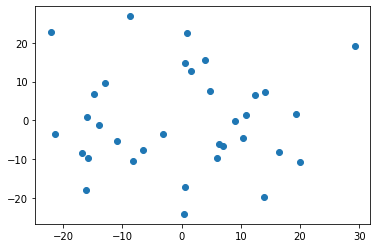

In [90]:
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])

In [92]:
tfidf_

,covid-19,sars-cov-2,patients,coronavirus,drugs,treatment,disease,clinical,infection,virus,...,bacterial,3c-like,synthetic,ascorbic,assays,turn,populations,science,room,hypothesize
1,2.401706,14.561701,3.688964,-0.782663,1.104560,2.309333,2.067841,1.212492,0.955295,-2.550903,...,0.000000,0.000000,0.000000,0.000000,5.207269,0.000000,0.000000,2.345198,3.160901,0.000000
2,0.461867,7.183773,0.194156,-0.115950,0.388089,0.369493,0.636259,0.060625,0.089559,-0.318863,...,0.000000,1.734601,2.140066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3.879679,0.000000,0.000000,-0.550763,0.298530,0.000000,0.000000,0.181874,0.149265,-1.101526,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.774606,0.000000,1.172599,0.000000,0.000000
4,1.108480,8.348709,1.359092,-0.028988,0.268677,0.738987,1.431582,1.091243,0.477647,-0.811651,...,0.000000,0.000000,0.000000,0.000000,4.165815,0.000000,0.000000,1.954332,1.580450,0.000000
5,4.156799,2.135716,6.795461,-1.565327,0.238824,4.895786,2.385970,6.183711,0.746324,-2.116090,...,2.447551,0.000000,0.000000,2.833213,0.000000,0.000000,0.000000,0.781733,0.000000,0.000000
6,1.939840,1.164936,1.164936,-0.202913,0.149265,0.831360,0.954388,0.181874,0.268677,-0.376838,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.781733,0.000000,0.000000
7,0.184747,3.106496,0.194156,-0.115950,0.447794,0.461867,0.159065,0.000000,0.328383,-0.347850,...,0.000000,0.000000,0.000000,0.000000,3.124362,0.000000,0.000000,0.000000,0.000000,0.000000
8,1.939840,0.194156,1.359092,-0.057975,0.238824,0.369493,0.000000,0.848745,0.208971,-0.202913,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.774606,0.000000,1.172599,0.000000,0.000000
9,2.309333,3.300652,15.726637,-0.376838,0.179118,6.004266,1.590647,1.273117,0.179118,-0.637726,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.887303,0.000000,1.172599,0.000000,0.000000
10,0.554240,9.125333,1.941560,-0.202913,1.462795,1.570346,1.908776,2.667483,2.298678,-3.826355,...,0.000000,0.000000,0.000000,0.000000,6.248723,0.000000,0.000000,2.736064,4.741351,0.000000


In [93]:
tfidf_.to_excel('./tfidf테이블.xlsx', encoding='utf-8-sig')

In [96]:
import seaborn as sns

In [99]:
cos_df

,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,most_similar
1,1.000000,0.231297,0.065869,0.058290,-0.019313,0.055071,0.298865,0.081741,0.050880,0.121065,...,0.163235,0.158082,0.181133,0.288083,0.092794,0.185628,0.144161,0.005380,0.145754,7
2,0.231297,1.000000,0.164515,0.273920,-0.163867,0.168359,0.302533,0.283711,0.167143,0.113720,...,0.249315,0.244756,0.328094,0.400561,0.103856,0.365101,0.219111,0.140468,0.268175,29
3,0.065869,0.164515,1.000000,0.030626,-0.127232,0.076830,-0.064591,0.254749,0.190225,0.172798,...,0.146782,-0.029606,0.163706,0.072575,0.043145,0.234544,-0.039937,0.059261,0.265866,14
4,0.058290,0.273920,0.030626,1.000000,0.028030,0.161103,0.084728,0.259842,0.014458,0.086001,...,0.239550,0.215339,0.134585,0.205383,0.094626,0.159678,0.144439,0.054221,0.203177,11
5,-0.019313,-0.163867,-0.127232,0.028030,1.000000,-0.016522,0.046765,-0.015356,0.004066,0.048524,...,-0.008325,0.069442,-0.056780,-0.029405,-0.172705,-0.066141,-0.066380,0.102173,-0.045759,33
6,0.055071,0.168359,0.076830,0.161103,-0.016522,1.000000,0.075521,0.142143,0.193062,0.072850,...,0.102159,0.192513,0.093202,0.119560,0.151886,0.035962,0.100289,-0.010641,0.313789,34
7,0.298865,0.302533,-0.064591,0.084728,0.046765,0.075521,1.000000,0.176210,0.048967,0.128083,...,0.214904,0.158772,0.125200,0.233753,-0.007819,0.168046,0.221606,0.005159,0.046504,22
8,0.081741,0.283711,0.254749,0.259842,-0.015356,0.142143,0.176210,1.000000,0.088855,0.339105,...,0.240244,0.207780,0.288166,0.283431,-0.005587,0.266753,0.154125,0.047907,0.196631,10
9,0.050880,0.167143,0.190225,0.014458,0.004066,0.193062,0.048967,0.088855,1.000000,-0.086335,...,0.103068,0.117690,0.141619,0.077829,-0.093685,0.193870,-0.063637,0.053103,0.211752,34
10,0.121065,0.113720,0.172798,0.086001,0.048524,0.072850,0.128083,0.339105,-0.086335,1.000000,...,0.210963,0.136911,0.261479,0.242289,-0.041338,0.201240,-0.001629,0.157727,0.074777,8


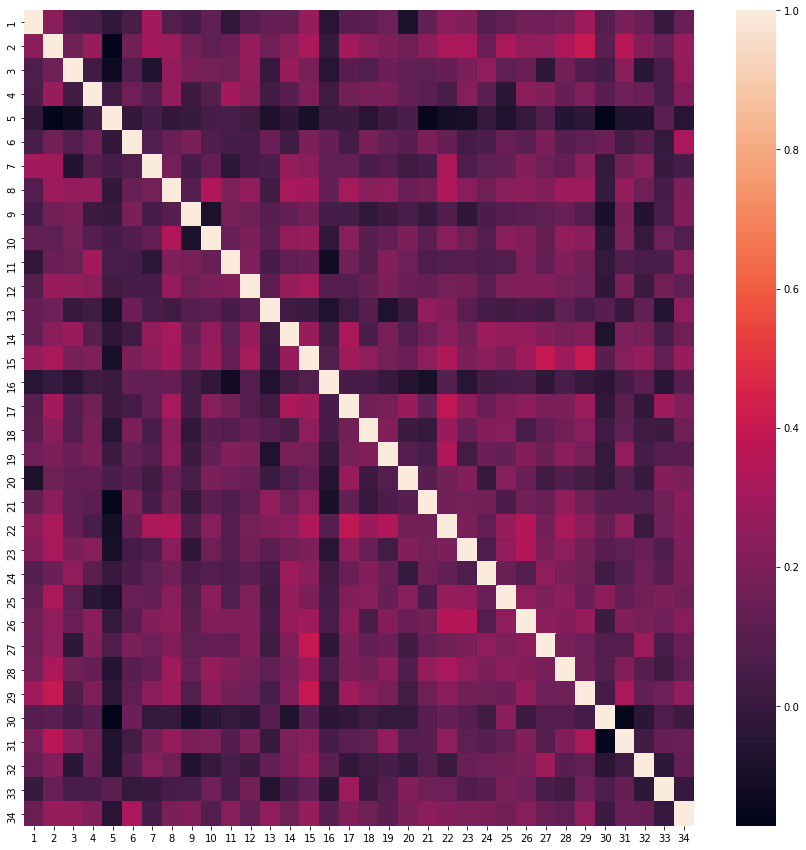

In [113]:
plt.figure(figsize=(15,15))
sns.heatmap(cos_df.iloc[:,:-1])

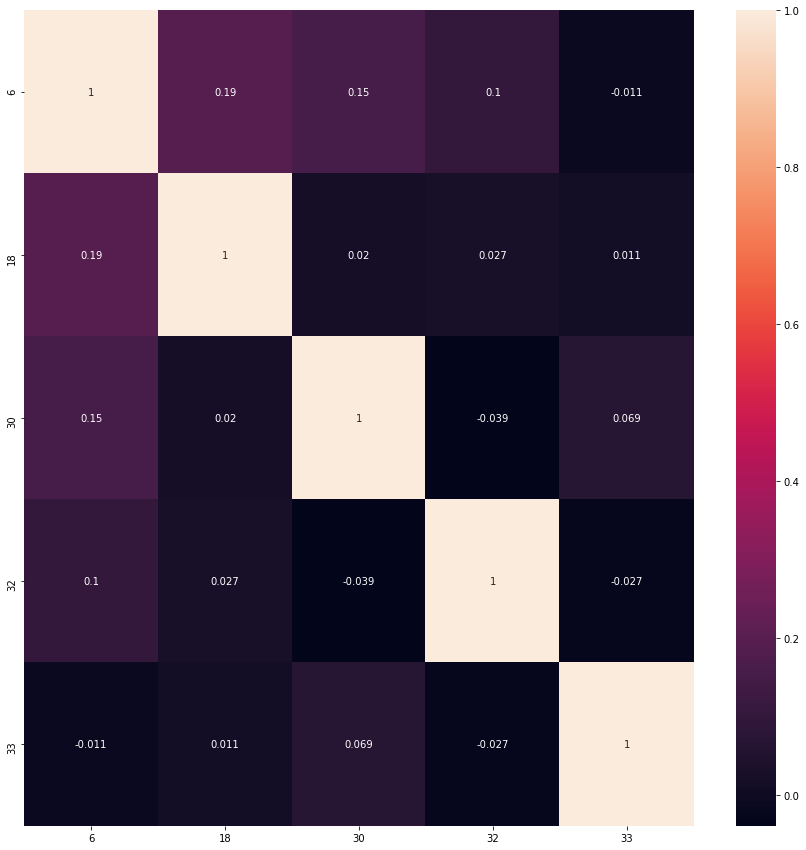

In [110]:
plt.figure(figsize=(15,15))
sns.heatmap(cos_df.iloc[[5,17,29,31,32],[5,17,29,31,32]], annot=True)